[Text(0.5, 1.0, 'No usable ACE')]

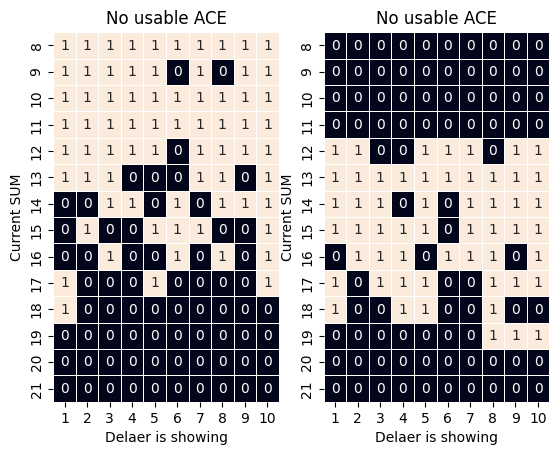

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import gymnasium as gym

env = gym.make("Blackjack-v1", sab = True)

pi = np.ones((32, 10, 2), dtype = int)

Q = np.zeros((32, 10, 2, 2))
g = np.zeros((32, 10, 2, 2))

N_ep = 10000
alpha = 1/500
gama = 1.
eps_init = 1.
eps_decay = eps_init/(N_ep/2)
eps_final = 0.2
eps = 0.9

actions = []; rewards = []

for i in range(N_ep):
    states = []; actions = []; rewards = []
    
    j = 0
    data = env.reset()
    o = data[0]
    
    ep_end = False
    
    while ep_end != True:
        p = np.random.rand(1)
        eps = np.max([eps_final, eps - eps_decay])
        if p<eps:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q[o[0] - 1, o[1] - 1, o[2],:])
            
        data = env.step(a)
        o = data[0]
        states.append(data[0])
        actions.append(int(a))
        rewards.append(data[1])
        ep_end = data[2]
        
    t = -1
    for state in states:
        t = t + 1
        g[state[0] - 1, state[1] - 1, state[2], actions[t]] = np.sum(rewards[t:])
        Q[state[0] - 1, state[1] - 1, state[2], actions[t]] = Q[state[0] - 1, state[1] - 1, state[2], actions[t]] + alpha * (g[state[0] - 1, state[1] - 1, state[2], actions[t]] - Q[state[0] - 1, state[1] - 1, state[2], actions[t]])
        
    pi_opt = np.zeros((32, 10, 2), dtype = int)
    for i in range(32):
        for j in range(10):
            for k in range(2):
                pi_opt[i, j, k] = np.argmax(Q[i, j, k, :])
                
    #plt.plot(np.convolute(D, np.ones(500)))
    #plt.show()
        
plt.figure()
plt.subplot(1, 2, 1)
axl = sns.heatmap(pi_opt[7:21,:,0], cbar=False, linewidth=0.5, annot=True, xticklabels=np.arange(10)+1, yticklabels=np.arange(14)+8)
axl.set(xlabel='Delaer is showing', ylabel='Current SUM')
axl.set(title='No usable ACE')
#plt.show()
plt.subplot(1, 2, 2)
ax = sns.heatmap(pi_opt[7:21,:,1], cbar=False, linewidth=0.5, annot=True, xticklabels=np.arange(10)+1, yticklabels=np.arange(14)+8)
ax.set(xlabel='Delaer is showing', ylabel='Current SUM')
ax.set(title='No usable ACE')